In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
os.getcwd()

'C:\\Users\\abels\\Desktop\\spotify_scrape'

In [3]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'API_KEYS.txt',
 'Capstone1_Analysis_of_top_200_Spotify.pdf',
 'Data',
 'README.md',
 'song_analysis_graphs.ipynb',
 'Song_Progression_Analysis.ipynb',
 'top_200_stream_numbers.ipynb',
 '__pycache__']

In [4]:
csv_path = os.getcwd() + '\\Data\\Top_200_Spotify_Data\\'

In [5]:
def csv_amalgimation(filename):
    csv_df = pd.read_csv(filename, encoding="latin1", parse_dates=[5])
    columns = ['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date']
    csv_df.columns = columns
    return csv_df

In [6]:
csv_list = []
for subdir, dirs, files in os.walk(csv_path):
    for file in files:
        csv_list.append(os.path.join(subdir, file))

In [7]:
dfs_to_append = []
error_csvs = []
for csv in csv_list:
    try:
        dfs_to_append.append(csv_amalgimation(csv))
    except:
        error_csvs.append(csv)
        pass

In [8]:
df = pd.DataFrame()
df = df.append(dfs_to_append, ignore_index=True)

In [32]:
#C:\Users\abels\Desktop\spotify_scrape\Data\csv_files\
df.to_csv(os.getcwd() + '\\Data\\csv_files\\Combined_Top_200_Stream_Numbers.csv')

In [9]:
print (df.shape)
df.head()

(170046, 6)


,Position,Track Name,Artist,Streams,URL,Date
0,Position,Track Name,Artist,Streams,URL,2017-01-01
1,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01
2,2,Closer,The Chainsmokers,3015525,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01
3,3,Let Me Love You,DJ Snake,2545384,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01
4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01


In [10]:
df['Streams'] = pd.to_numeric(df['Streams'], errors='coerce')

In [11]:
df['Streams'].dtype

dtype('float64')

In [12]:
df['Streams'].head()

0          NaN
1    3135625.0
2    3015525.0
3    2545384.0
4    2356604.0
Name: Streams, dtype: float64

In [13]:
mask = (~np.isnan(df['Streams']))

In [14]:
mask.shape

(170046,)

In [15]:
mask.head()

0    False
1     True
2     True
3     True
4     True
Name: Streams, dtype: bool

In [16]:
df.shape

(170046, 6)

In [17]:
df = df[mask]

In [18]:
df.shape

(169200, 6)

In [19]:
df.head()

,Position,Track Name,Artist,Streams,URL,Date
1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01
2,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01
3,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01
4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01
5,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01


In [20]:
top_artists = df.groupby('Artist')['Streams'].sum().reset_index()
top_artists = top_artists.sort_values('Streams', ascending=False)

In [21]:
print (top_artists.head())

            Artist       Streams
544    Post Malone  7.730977e+09
198     Ed Sheeran  6.779223e+09
191          Drake  6.622569e+09
710   XXXTENTACION  5.110401e+09
45   Ariana Grande  4.220703e+09


In [22]:
top_song = df.groupby(['Track Name','Artist']).sum().sort_values('Streams', ascending=False)

In [23]:
top_song.head()

,,Streams
Track Name,Artist,
Shape of You,Ed Sheeran,2.090274e+09
God's Plan,Drake,1.243688e+09
New Rules,Dua Lipa,1.102638e+09
Perfect,Ed Sheeran,1.062269e+09
Despacito - Remix,Luis Fonsi,1.036822e+09


In [24]:
#df = df.set_index('Date')

In [25]:
df.head()

,Position,Track Name,Artist,Streams,URL,Date
1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01
2,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01
3,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01
4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01
5,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01


In [26]:
df.head()

,Position,Track Name,Artist,Streams,URL,Date
1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01
2,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01
3,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01
4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01
5,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01


In [27]:
streams_over_time = df.groupby('Date').sum()
streams_over_time_month = streams_over_time.resample('m').sum()

In [28]:
print (streams_over_time_month)

                 Streams
Date                    
2017-01-31  5.591482e+09
2017-02-28  5.260894e+09
2017-03-31  7.027339e+09
2017-04-30  6.457311e+09
2017-05-31  6.389516e+09
2017-06-30  6.204961e+09
2017-07-31  6.406648e+09
2017-08-31  6.266664e+09
2017-09-30  6.317475e+09
2017-10-31  6.378529e+09
2017-11-30  6.195185e+09
2017-12-31  6.784018e+09
2018-01-31  6.586879e+09
2018-02-28  6.151170e+09
2018-03-31  6.862314e+09
2018-04-30  7.103546e+09
2018-05-31  7.026595e+09
2018-06-30  7.013290e+09
2018-07-31  7.335921e+09
2018-08-31  7.089773e+09
2018-09-30  6.849942e+09
2018-10-31  7.094069e+09
2018-11-30  6.957297e+09
2018-12-31  7.800270e+09
2019-01-31  7.243675e+09
2019-02-28  7.193705e+09
2019-03-31  7.505230e+09
2019-04-30  7.326940e+09


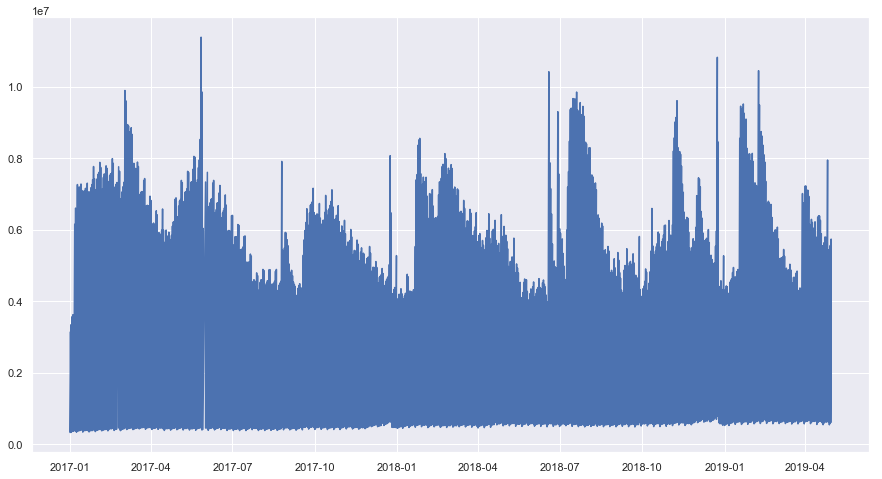

In [29]:
pd.plotting.register_matplotlib_converters()
%matplotlib inline
_ = plt.figure(figsize=(15,8))
_ = plt.plot(df['Date'], df['Streams'])
plt.show()

In [30]:
streams_over_time_month.index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30'],
              dtype='datetime64[ns]', name='Date', freq='M')

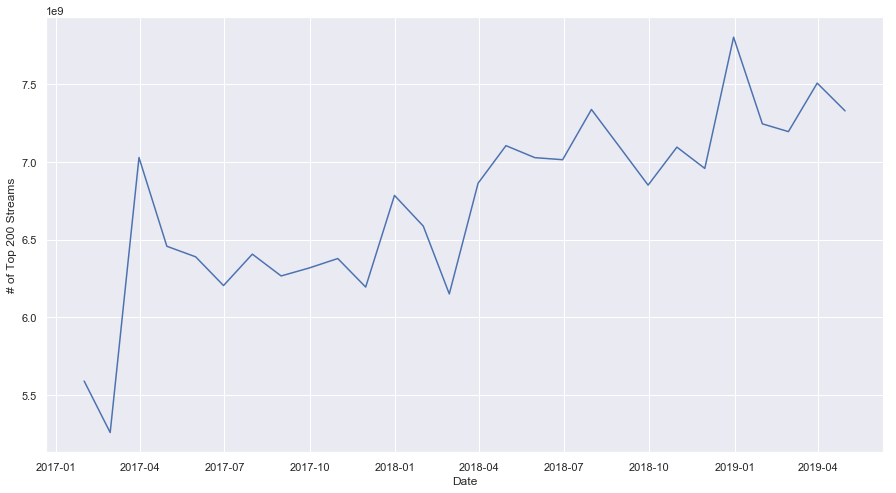

In [31]:
%matplotlib inline
fig = plt.figure()
fig.set_size_inches(15, 8, forward=True)
_ = plt.plot(streams_over_time_month.index, streams_over_time_month['Streams'])
_ = plt.xlabel('Date')
_ = plt.ylabel('# of Top 200 Streams')
plt.show()